In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Input, Dense

In [3]:
dataset = pd.read_csv("spam.csv", encoding='latin-1')

In [4]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
dataset = dataset[["v1","v2"]]

In [6]:
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.rename(columns={"v1":"Labels","v2":"Mails"},inplace=True)

C:\Users\hp8cg\AppData\Local\Temp\ipykernel_9532\3218461215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.rename(columns={"v1":"Labels","v2":"Mails"},inplace=True)


In [8]:
dataset

,Labels,Mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
dataset.duplicated().sum()

403

In [10]:
df1 = dataset[dataset.duplicated()]
df1

,Labels,Mails
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
dataset.drop_duplicates(inplace=True)

C:\Users\hp8cg\AppData\Local\Temp\ipykernel_9532\2870039874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(inplace=True)


In [12]:
dataset.isnull().sum()

Labels    0
Mails     0
dtype: int64

In [13]:
dataset.shape 

(5169, 2)

In [14]:
dataset["Labels"].value_counts()

Labels
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
Labels = dataset[["Labels"]]

In [16]:
Labels

,Labels
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [17]:
Labels.shape

(5169, 1)

In [18]:
Email_Text = dataset[["Mails"]]

In [19]:
Email_Text

,Mails
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [20]:
Email_Text.shape

(5169, 1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Labels = le.fit_transform(Labels)

C:\Users\hp8cg\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
Labels

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
Email_Text

,Mails
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [24]:
X_train, X_test, y_train, y_test = train_test_split(Email_Text, Labels, test_size=0.25) 

In [25]:
X_train.shape

(3876, 1)

In [26]:
X_test.shape

(1293, 1)

In [27]:
y_test.shape

(1293,)

In [28]:
y_train.shape

(3876,)

In [29]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train["Mails"])
train_sequences = tokenizer.texts_to_sequences(X_train["Mails"])
test_sequences = tokenizer.texts_to_sequences(X_test["Mails"])

In [30]:
test_sequences[:10]

[[28,
  291,
  83,
  26,
  2,
  1166,
  107,
  7,
  183,
  154,
  107,
  36,
  113,
  26,
  861,
  48,
  47,
  12,
  10],
 [245, 210, 416, 16, 19, 161],
 [303, 1, 239, 22, 546, 144, 544, 7273, 77],
 [2, 16, 56, 24, 2, 20],
 [49, 34, 38, 27, 8, 5, 834, 407],
 [1619,
  4,
  283,
  105,
  721,
  3171,
  72,
  232,
  1925,
  160,
  1,
  63,
  54,
  1064,
  779,
  24,
  72,
  1669,
  291,
  1745,
  727,
  469],
 [59, 59, 292, 1, 57],
 [148, 51, 187, 122, 1189, 31, 631, 306, 18],
 [126,
  264,
  102,
  12,
  5,
  212,
  928,
  86,
  9,
  5,
  468,
  15,
  94,
  661,
  2166,
  12,
  131,
  572,
  734,
  19,
  3,
  426,
  545,
  7,
  75,
  58,
  223,
  150,
  48,
  47,
  88,
  165,
  4,
  738],
 [14, 145, 87, 79, 48, 47, 209]]

In [31]:
unique_words = tokenizer.word_index
len(unique_words)

7571

In [32]:
train_sequences[:3]

[[37,
  38,
  415,
  705,
  343,
  312,
  4,
  122,
  7,
  766,
  3376,
  1,
  98,
  38,
  73,
  3,
  353,
  8,
  109,
  3377,
  3378,
  22,
  114,
  53,
  503,
  1757],
 [31, 84, 1093, 53, 46, 261, 300],
 [3379, 28, 3380, 28, 3381, 28, 3382]]

In [33]:
## max length of sequence
max_len = max([len(seq) for seq in train_sequences])
max_len
## for test sequence it is 117

189

In [34]:
train_sequences_padded = pad_sequences(train_sequences, maxlen=max_len, padding='pre')
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len, padding='pre')

In [35]:
train_sequences_padded

array([[   0,    0,    0, ...,   53,  503, 1757],
       [   0,    0,    0, ...,   46,  261,  300],
       [   0,    0,    0, ..., 3381,   28, 3382],
       ...,
       [   0,    0,    0, ...,    8,  408,  102],
       [   0,    0,    0, ...,   48,   47,  276],
       [   0,    0,    0, ...,    3, 1760,  200]])

In [36]:
print(train_sequences_padded.shape)
print(test_sequences_padded.shape)

(3876, 189)
(1293, 189)


In [37]:
i = Input(shape=(max_len,))
x = Embedding(8000 , 20)(i)
x = LSTM(64,return_sequences=True)(x)
x = LSTM(32)(x)
x = Dense(32, activation="relu")(x)
x= Dense(1, activation="sigmoid")(x)
model = Model(i,x)

In [38]:
model.compile(loss="binary_crossentropy",optimizer="adam" ,metrics=["accuracy"])

In [39]:
training = model.fit(train_sequences_padded, y_train, epochs=10, validation_data=(test_sequences_padded, y_test))

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.8627 - loss: 0.3829 - val_accuracy: 0.9652 - val_loss: 0.1213
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9850 - loss: 0.0585 - val_accuracy: 0.9753 - val_loss: 0.0825
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9939 - loss: 0.0271 - val_accuracy: 0.9768 - val_loss: 0.0969
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9822 - val_loss: 0.0779
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.9995 - loss: 0.0049 - val_accuracy: 0.9760 - val_loss: 0.1159
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9984 - loss: 0.0101 - val_accuracy: 0.9783 - val_loss: 0.1116
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.9783 - val_loss: 0.1025
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9995 - loss: 0.0025 -

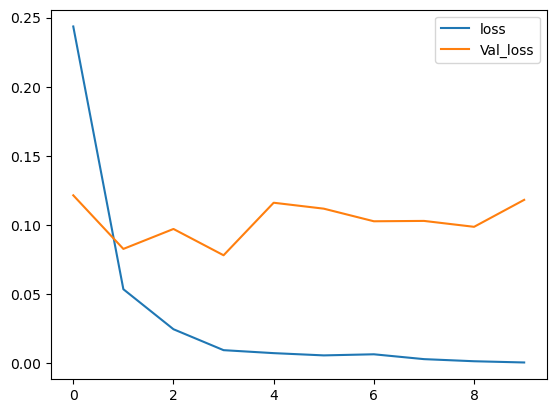

In [40]:
plt.plot(training.history["loss"],label="loss")
plt.plot(training.history["val_loss"],label="Val_loss")
plt.legend()

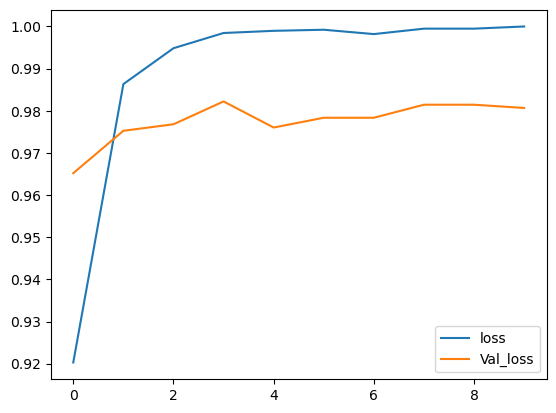

In [41]:
plt.plot(training.history["accuracy"],label="loss")
plt.plot(training.history["val_accuracy"],label="Val_loss")
plt.legend()

In [42]:
def predict_spam(mail):
      sequence = tokenizer.texts_to_sequences([mail])
      padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='pre')
      prediction = model.predict(padded_sequence)
      if prediction > 0.7:
        return "Spam"
      else:
        return "Not Spam"

In [43]:
predict_spam('Free entry in 2 a wkly comp to win FA Cup final')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


'Spam'